In [3]:
import pandas as pd

file_path = 'taas크롤링/merged_result.csv'

# CSV 파일을 읽어 데이터프레임으로 변환
merged_data = pd.read_csv(file_path)

# 데이터의 상위 몇 행을 확인
merged_data.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,lat(위도),lon(경도)
0,2022010100100001,2022년 1월 1일 00시,토요일,서울특별시 중구 충무로5가,경상사고,0,0,1,0,차대차 - 기타,...,승용,남,63세,상해없음,승용,남,67세,경상,37.562573,126.999652
1,2022010100100002,2022년 1월 1일 00시,토요일,서울특별시 송파구 신천동,중상사고,0,2,0,0,차대사람 - 횡단중,...,승용,남,69세,상해없음,보행자,여,16세,중상,37.513698,127.100279
2,2022010100100017,2022년 1월 1일 02시,토요일,서울특별시 금천구 독산동,부상신고사고,0,0,0,1,차량단독 - 기타,...,이륜,남,24세,부상신고,NaN,NaN,NaN,NaN,37.478129,126.897995
3,2022010100100018,2022년 1월 1일 02시,토요일,서울특별시 강동구 천호동,경상사고,0,0,2,0,차대차 - 측면충돌,...,승용,여,61세,상해없음,승용,남,61세,경상,37.540442,127.128288
4,2022010100100037,2022년 1월 1일 06시,토요일,서울특별시 강남구 역삼동,중상사고,0,1,0,0,차대사람 - 기타,...,승용,남,62세,상해없음,보행자,여,61세,중상,37.504734,127.044390


In [4]:
# 데이터 전처리 시작
# 필요한 열만 선택하고, 필요한 처리를 진행합니다.

# '시군구' 열을 기준으로 데이터를 그룹화하고 사고 건수를 계산합니다.
accident_counts = merged_data.groupby('시군구').size().reset_index(name='사고건수')

# 데이터의 상위 몇 행을 확인
accident_counts.head()

,시군구,사고건수
0,서울특별시 강남구 개포동,202
1,서울특별시 강남구 논현동,554
2,서울특별시 강남구 대치동,482
3,서울특별시 강남구 도곡동,224
4,서울특별시 강남구 삼성동,379


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 모델 학습을 위해 필요한 라이브러리를 불러옵니다.

# '시군구' 열에서 구 이름만 추출합니다.
accident_counts['구'] = accident_counts['시군구'].str.split().str[1]

# '구'를 기반으로 그룹화하여 사고 건수의 합계를 계산합니다.
grouped_accidents = accident_counts.groupby('구')['사고건수'].sum().reset_index()

# '구'를 범주형 데이터로 변환합니다.
grouped_accidents['구'] = pd.Categorical(grouped_accidents['구'])

# 범주형 데이터를 수치형 데이터로 변환합니다.
grouped_accidents['구_code'] = grouped_accidents['구'].cat.codes

# 특성(구 코드)과 타겟(사고 건수)을 분리합니다.
X = grouped_accidents[['구_code']]
y = grouped_accidents['사고건수']

# 데이터를 훈련 세트와 테스트 세트로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 랜덤 포레스트 회귀 모델
rdf_reg = RandomForestRegressor(random_state=0)
rdf_reg.fit(X_train, y_train)
y_pred_rdf = rdf_reg.predict(X_test)
mse_rdf = mean_squared_error(y_test, y_pred_rdf)
rmse_rdf = np.sqrt(mse_rdf)

# 선형 회귀 모델
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)

# 결정 트리 회귀 모델
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)

# 그래디언트 부스팅 회귀 모델
gb_reg = GradientBoostingRegressor(random_state=0)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)


# 모든 모델의 RMSE 결과를 반환
rmse_lin, rmse_tree, rmse_rdf,rmse_gb


# 랜덤 포레스트 회귀 모델이 가장 낮은 RMSE 값을 가지며, 따라서 가장 신뢰할 수 있는 모델로 판단

(610.3577260731271, 476.80666941644176, 420.3701825296366, 473.3802382254669)

In [9]:
# 모든 구에 대해 예측 수행
grouped_accidents['predicted_accidents'] = rdf_reg.predict(grouped_accidents[['구_code']])

# 예측된 사고 건수를 포함하는 데이터프레임 저장
predicted_accidents_file_path = 'predicted_traffic_accidents.csv'
grouped_accidents.to_csv(predicted_accidents_file_path, index=False)

predicted_accidents_file_path


'predicted_traffic_accidents.csv'

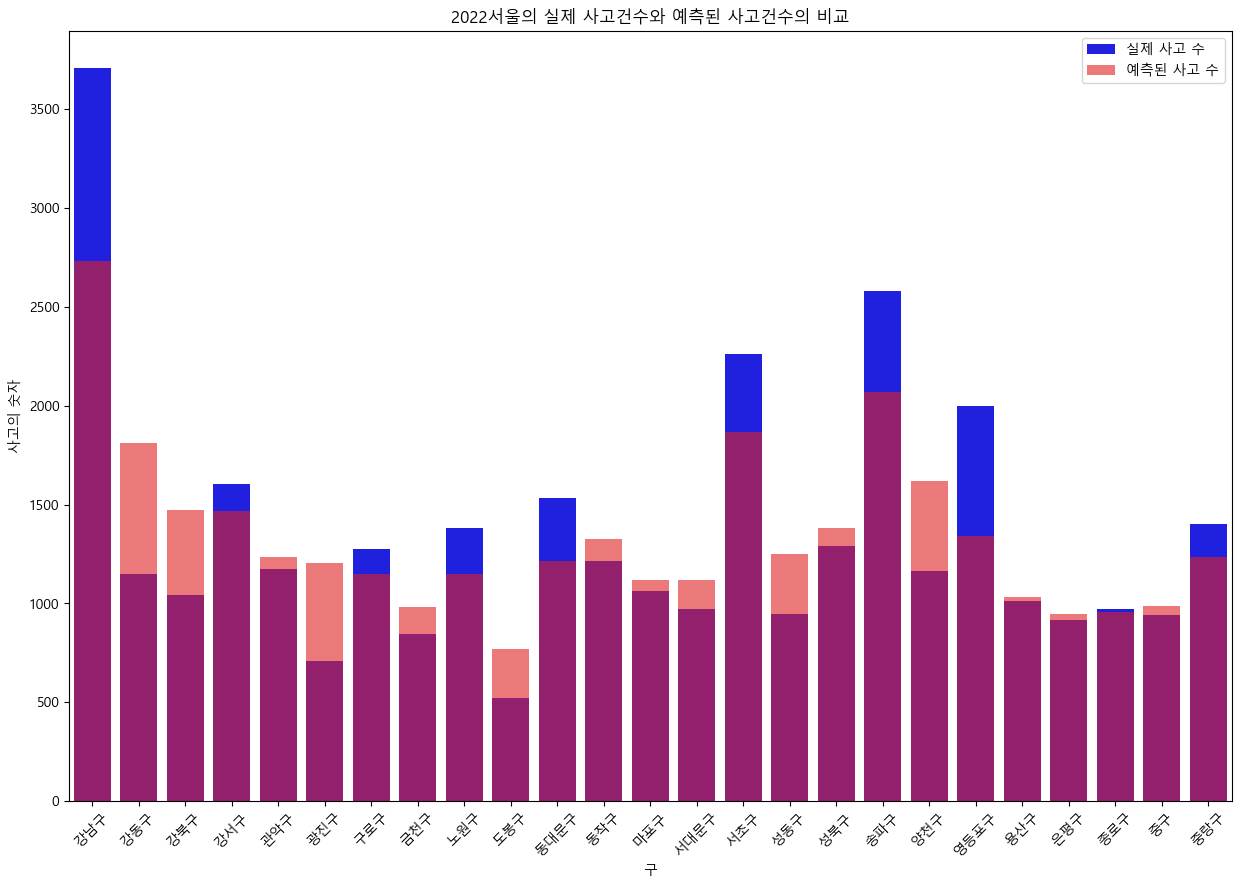

In [12]:
import pandas as pd

# 예측된 교통사고 데이터 파일을 불러옵니다.
predicted_accidents_file_path = 'predicted_traffic_accidents.csv'
predicted_accidents = pd.read_csv(predicted_accidents_file_path)

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 실제 사고 건수와 예측된 사고 건수 비교를 위한 시각화
plt.figure(figsize=(15, 10))
sns.barplot(x='구', y='사고건수', data=predicted_accidents, color='blue', label='실제 사고 수')
sns.barplot(x='구', y='predicted_accidents', data=predicted_accidents, color='red', alpha=0.6, label='예측된 사고 수')

plt.xticks(rotation=45)
plt.ylabel('사고의 숫자')
plt.title('2022서울의 실제 사고건수와 예측된 사고건수의 비교')
plt.legend()
plt.show()

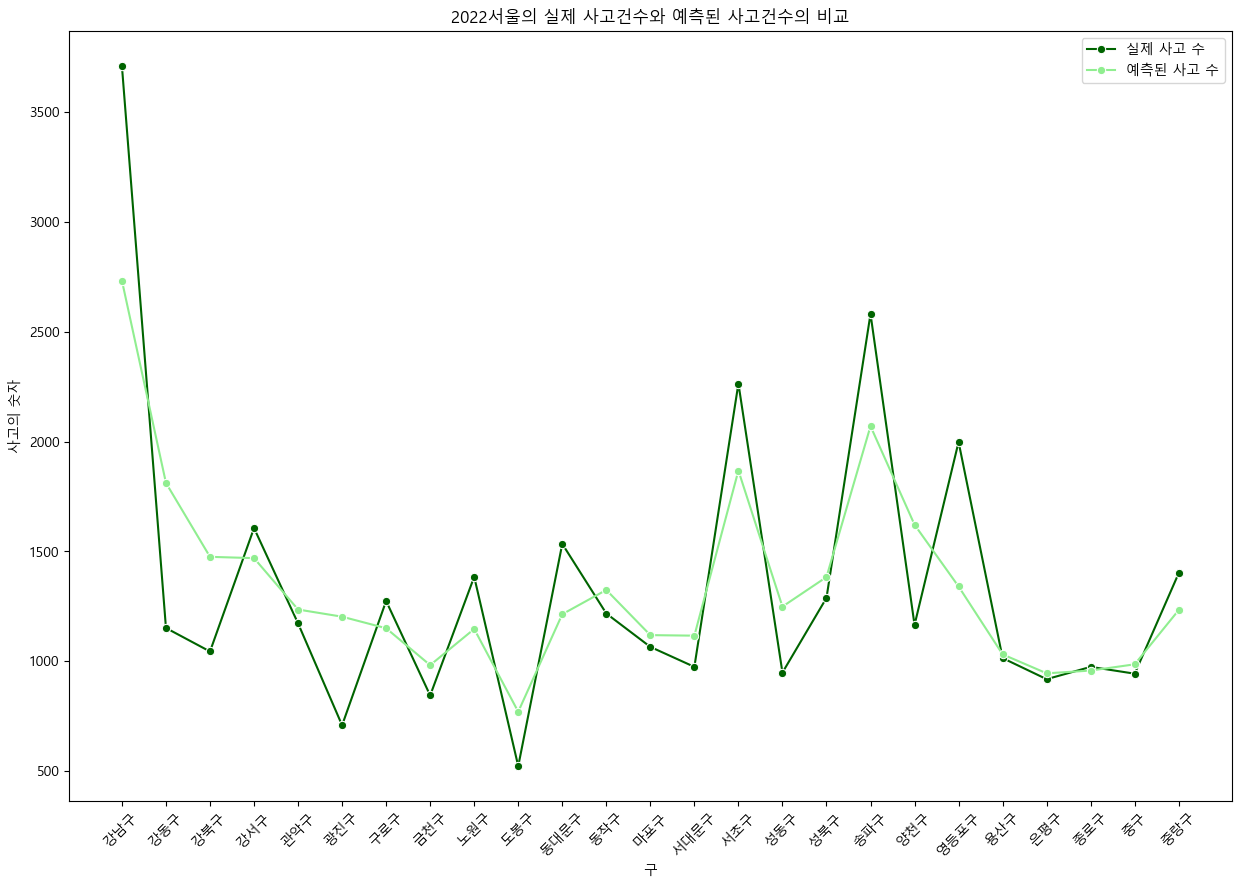

In [18]:
# 꺾은선 그래프를 사용하여 서울특별시 각 구별 실제 사고 건수와 예측된 사고 건수 비교

plt.figure(figsize=(15, 10))
sns.lineplot(data=predicted_accidents, x='구', y='사고건수', marker='o', label='실제 사고 수', color='darkgreen')
sns.lineplot(data=predicted_accidents, x='구', y='predicted_accidents', marker='o', label='예측된 사고 수',color='lightgreen')

plt.xticks(rotation=45)
plt.ylabel('사고의 숫자')
plt.title('2022서울의 실제 사고건수와 예측된 사고건수의 비교')
plt.legend()
plt.show()


In [8]:
# # 서울특별시 각 구별 교통사고 발생 예측을 위해 new_seoul_geo.json 파일 사용
# # 먼저, new_seoul_geo.json 파일을 다시 로드하고, 서울특별시의 각 구 이름을 추출합니다.
# # 시군구 경계 GeoJSON 파일 읽기
# import json

# geojson_path = 'new_seoul_geo.json'

# # GeoJSON 파일 로드
# with open(geojson_path, 'r', encoding='utf-8') as file:
#     seoul_geojson = json.load(file)

# # 서울특별시 각 구의 이름 추출
# districts_geojson = [feature['properties']['name'] for feature in seoul_geojson['features']]

# # grouped_accidents 데이터프레임에서 구 이름 추출
# districts_grouped = grouped_accidents['구'].unique()

# # 두 리스트에서 공통되는 구 이름만 사용
# common_districts = [district for district in districts_grouped if district in districts_geojson]

# # GeoJSON 파일에서 각 구의 중심 좌표 계산
# def calculate_centroid(geometry):
#     """다각형의 중심 좌표를 계산하는 함수"""
#     polygon = geometry['coordinates'][0]
#     x_coords = [p[0] for p in polygon]
#     y_coords = [p[1] for p in polygon]
#     centroid_x = sum(x_coords) / len(polygon)
#     centroid_y = sum(y_coords) / len(polygon)
#     return centroid_x, centroid_y


# # 각 구별 중심 좌표 계산
# centroids = [calculate_centroid(feature['geometry']) for feature in seoul_geojson['features'] if feature['properties']['name'] in common_districts]
# latitudes, longitudes = zip(*centroids)

# # 예측 데이터 프레임 수정
# predicted_data = pd.DataFrame({'구': common_districts, 'lon': latitudes, 'lat': longitudes})

# # 각 구에 대한 구 코드 매핑
# predicted_data['구_code'] = predicted_data['구'].map(lambda x: grouped_accidents[grouped_accidents['구'] == x]['구_code'].values[0])

# # 랜덤 포레스트 모델을 사용하여 예측 수행
# predicted_data['predicted_accidents'] = RandomForestRegressor.predict(predicted_data[['구_code']])

# predicted_data.head()


TypeError: ForestRegressor.predict() missing 1 required positional argument: 'X'

In [ ]:
# import folium
# from folium.plugins import MarkerCluster

# # 서울특별시 중심의 위도와 경도
# seoul_lat, seoul_lon = 37.5642135, 127.0016985

# # 서울 지도 생성
# seoul_map = folium.Map(location=[seoul_lat, seoul_lon], zoom_start=11)

# # 마커 클러스터 객체 생성
# marker_cluster = MarkerCluster().add_to(seoul_map)

# # 클러스터에 마커 추가
# for idx, row in merged_data.iterrows():
#     folium.Marker([row['lat(위도)'], row['lon(경도)']], popup=row['시군구']).add_to(marker_cluster)


# # 예측된 위치 데이터를 지도에 표시
# predicted_marker_cluster = MarkerCluster(name='Predicted Accidents').add_to(seoul_map)

# # 클러스터에 마커 추가
# for idx, row in predicted_data.iterrows():
#     folium.Marker(
#         [row['lat'], row['lon']],
#         popup=f"{row['구']}: 예측 사고 건수 {row['predicted_accidents']}"
#     ).add_to(predicted_marker_cluster)

# # 레이어 컨트롤 추가 (레이어를 토글할 수 있게 함)
# folium.LayerControl().add_to(seoul_map)

# # 지도를 HTML 파일로 저장
# map_file_path = 'seoul_traffic_accidents_map.html'
# seoul_map.save(map_file_path)


# seoul_map